In [1]:
print("This is an initial Exploratory Data Analysis for the Recruit Restaurant Visitor Forecasting competition using Python's Matplotlib and Seaborn. \n\n"
      "The aim of this challenge is to predict the future numbers of restaurant visitors. This makes it a Time Series Forecasting problem. The data was collected from Japanese restaurants. As we will see, the data set is small and easily accessible without requiring much memory or computing power. Therefore, this competition is particularly suited for beginners. \n\n"
      "The data comes in the shape of 8 relational files which are derived from two separate Japanese websites that collect user information: “Hot Pepper Gourmet (hpg): similar to Yelp” (search and reserve) and “AirREGI / Restaurant Board (air): similar to Square” (reservation control and cash register). The training data is based on the time range of Jan 2016 - most of Apr 2017, while the test set includes the last week of Apr plus May 2017. The test data “intentionally spans a holiday week in Japan called the ‘Golden Week.’ The data description further notes that:”There are days in the test set where the restaurant were closed and had no visitors. These are ignored in scoring. The training set omits days where the restaurants were closed.")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

pd.options.display.max_columns = 50
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Before using the data in the datasets please copy and paste the datasets in the notebook to a suitable location.


AIR_RESERVE = pd.read_csv("C://Users/Johail/Desktop/Datasets/air_reserve.csv")                  #reading the air reserve csv data
AIR_VISIT_DATA = pd.read_csv("C://Users/Johail/Desktop/Datasets/air_visit_data.csv")            #reading the air visit csv data
AIR_STORE_INFO = pd.read_csv("C://Users/Johail/Desktop/Datasets/air_store_info.csv")            #reading the air store csv data
DATE_INFO = pd.read_csv("C://Users/Johail/Desktop/Datasets/date_info.csv").rename(columns={'calendar_date': 'visit_date'})       #reading the date csv data
HPG_RESERVE = pd.read_csv("C://Users/Johail/Desktop/Datasets/hpg_reserve.csv")                  #reading the hpg reserve csv data
HPG_STORE_INFO = pd.read_csv("C://Users/Johail/Desktop/Datasets/hpg_store_info.csv",  encoding = 'utf8')               #reading the hpg store info csv data
SAMPLE_SUBMISSION = pd.read_csv("C://Users/Johail/Desktop/Datasets/sample_submission.csv")      #reading the sample submission csv data
STORE_ID_RELATION = pd.read_csv("C://Users/Johail/Desktop/Datasets/store_id_relation.csv")        #reading the store id relation for the air and hpg store 

This is an initial Exploratory Data Analysis for the Recruit Restaurant Visitor Forecasting competition using Python's Matplotlib and Seaborn. 

The aim of this challenge is to predict the future numbers of restaurant visitors. This makes it a Time Series Forecasting problem. The data was collected from Japanese restaurants. As we will see, the data set is small and easily accessible without requiring much memory or computing power. Therefore, this competition is particularly suited for beginners. 

The data comes in the shape of 8 relational files which are derived from two separate Japanese websites that collect user information: “Hot Pepper Gourmet (hpg): similar to Yelp” (search and reserve) and “AirREGI / Restaurant Board (air): similar to Square” (reservation control and cash register). The training data is based on the time range of Jan 2016 - most of Apr 2017, while the test set includes the last week of Apr plus May 2017. The test data “intentionally spans a holiday week in Ja

In [2]:
AIR_RESERVE.describe()
AIR_RESERVE.head()
AIR_VISIT_DATA.describe()
AIR_VISIT_DATA.head()
AIR_STORE_INFO.describe()
AIR_STORE_INFO.head()
DATE_INFO.describe()
DATE_INFO.head()
HPG_RESERVE.describe()
HPG_RESERVE.head()
HPG_STORE_INFO.describe()
HPG_STORE_INFO.head()
SAMPLE_SUBMISSION.describe()
SAMPLE_SUBMISSION.head()
STORE_ID_RELATION.describe()
STORE_ID_RELATION.head()

,reserve_visitors
count,92378.000000
mean,4.481749
std,4.919669
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,100.000000


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


,latitude,longitude
count,829.000000,829.000000
mean,35.647042,137.415311
std,2.084659,3.650971
min,33.211967,130.195555
25%,34.695124,135.341564
50%,35.658068,139.685474
75%,35.694003,139.751599
max,44.020632,144.273398


,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


,holiday_flg
count,517.000000
mean,0.067698
std,0.251471
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


,reserve_visitors
count,2.000320e+06
mean,5.073785e+00
std,5.416172e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.000000e+02


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


,latitude,longitude
count,4690.000000,4690.000000
mean,35.810261,137.675816
std,2.138755,3.197233
min,33.311645,130.339313
25%,34.692109,135.498859
50%,35.659214,139.495733
75%,35.703381,139.737998
max,43.774846,143.714585


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


,visitors
count,32019.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


,air_store_id,hpg_store_id
count,150,150
unique,150,150
top,air_2cee51fa6fdf6c0d,hpg_2fcae64da5287bf5
freq,1,1


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [3]:
print("Those are the individual files: \n\n"
      "air_visit_data.csv: historical visit data for the air restaurants. This is essentially the main training data set.\n"
      "air_reserve.csv / hpg_reserve.csv: reservations made through the air / hpg systems. \n"
      "air_store_info.csv / hpg_store_info.csv: details about the air / hpg restaurants including genre and location. \n"
      "store_id_relation.csv: connects the air and hpg ids. \n"
      "date_info.csv: essentially flags the Japanese holidays. \n"
      "sample_submission.csv: serves as the test set. The id is formed by combining the air id with the visit date. \n ")

Those are the individual files: 

air_visit_data.csv: historical visit data for the air restaurants. This is essentially the main training data set.
air_reserve.csv / hpg_reserve.csv: reservations made through the air / hpg systems. 
air_store_info.csv / hpg_store_info.csv: details about the air / hpg restaurants including genre and location. 
store_id_relation.csv: connects the air and hpg ids. 
date_info.csv: essentially flags the Japanese holidays. 
sample_submission.csv: serves as the test set. The id is formed by combining the air id with the visit date. 
 


In [4]:
print("Reading the datasets. First, check the contents of the input folder. We have loaded the required libraries and read the data using read_csv method")

Reading the datasets. First, check the contents of the input folder. We have loaded the required libraries and read the data using read_csv method


Text(0.5,1,'AIR_VISIT_DATA')

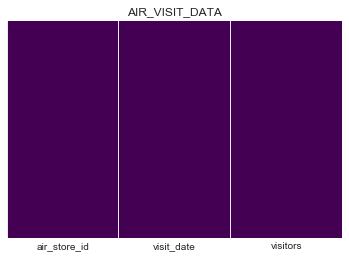

In [5]:
data1 = sns.heatmap(AIR_VISIT_DATA.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data1.set_title('AIR_VISIT_DATA')

Text(0.5,1,'AIR_STORE_INFO')

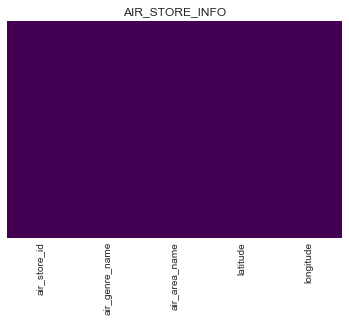

In [6]:
data2 = sns.heatmap(AIR_STORE_INFO.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data2.set_title('AIR_STORE_INFO')

Text(0.5,1,'HPG_STORE_INFO')

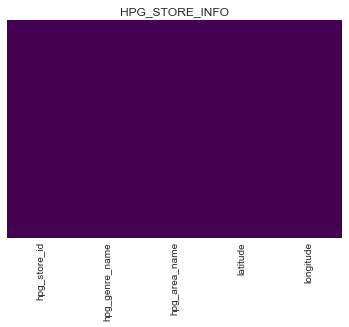

In [7]:
data3 = sns.heatmap(HPG_STORE_INFO.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data3.set_title('HPG_STORE_INFO')

Text(0.5,1,'AIR_RESERVE')

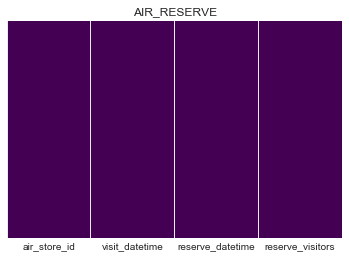

In [8]:
data4 = sns.heatmap(AIR_RESERVE.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data4.set_title('AIR_RESERVE')

Text(0.5,1,'HPG_RESERVE')

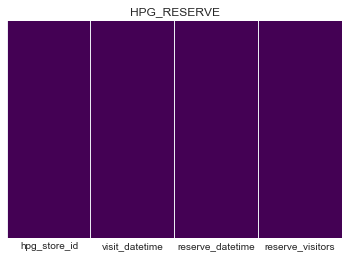

In [9]:
data5 = sns.heatmap(HPG_RESERVE.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data5.set_title('HPG_RESERVE')

Text(0.5,1,'STORE_ID_RELATION')

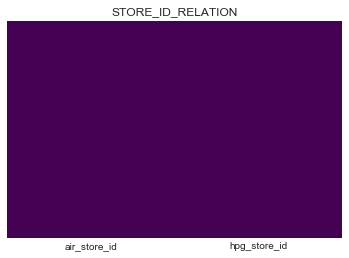

In [10]:
data6 = sns.heatmap(STORE_ID_RELATION.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data6.set_title('STORE_ID_RELATION')

Text(0.5,1,'SAMPLE_SUBMISSION')

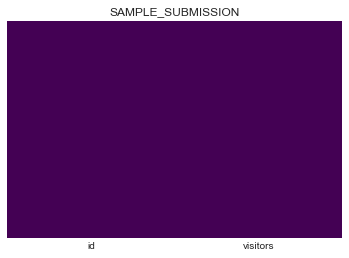

In [11]:
data7 = sns.heatmap(SAMPLE_SUBMISSION.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data7.set_title('SAMPLE_SUBMISSION')

Text(0.5,1,'DATE_INFO')

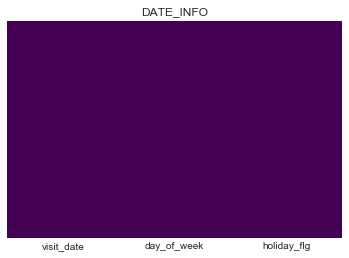

In [12]:
data8 = sns.heatmap(DATE_INFO.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data8.set_title('DATE_INFO')

4 Individual feature visualisations Here we have a first look at the distributions of the feature in our individual data files before combining them for a more detailed analysis. This inital visualisation will be the foundation on which we build our analysis. 

4.1 Air Visits We start with the number of visits to the air restaurants. Here we plot the total number of visitors per day over the full training time range together with the median visitors per day of the week and month of the year:


<Figure size 1080x504 with 0 Axes>

Text(0.5,0,'Date')

Text(0,0.5,'Number of Visitors')

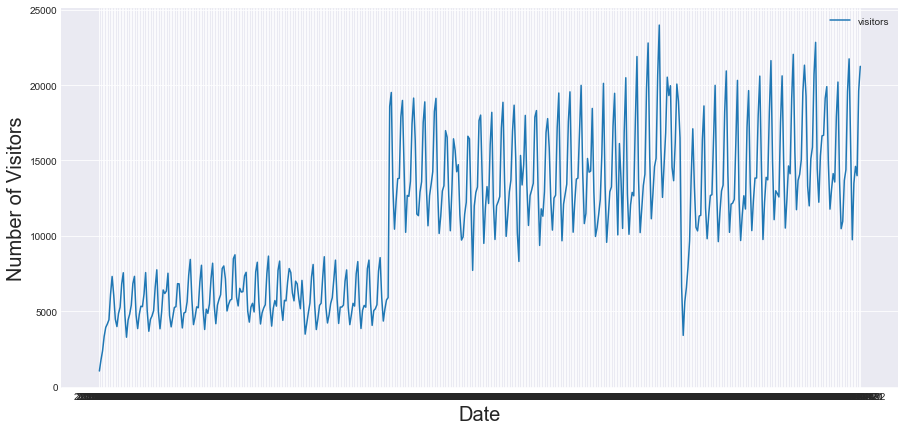

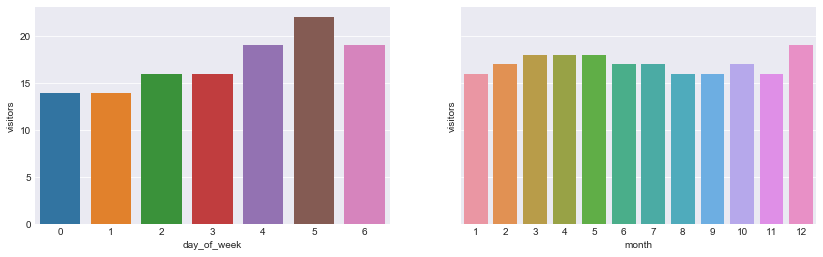

In [13]:
print("4 Individual feature visualisations Here we have a first look at the distributions of the feature in our individual data files before combining them for a more detailed analysis. This inital visualisation will be the foundation on which we build our analysis. \n\n"
      "4.1 Air Visits We start with the number of visits to the air restaurants. Here we plot the total number of visitors per day over the full training time range together with the median visitors per day of the week and month of the year:")
a = AIR_VISIT_DATA.groupby(AIR_VISIT_DATA['visit_date'])['visitors'].sum()
plt.figure(figsize=(15,7))
plt.plot(a.index, a)

plt.xlabel("Date", fontsize=20)
plt.ylabel("Number of Visitors",fontsize= 20)
plt.legend()

AIR_VISIT_DATA['visit_date'] = pd.to_datetime(AIR_VISIT_DATA['visit_date'])
AIR_VISIT_DATA['day_of_week'] = AIR_VISIT_DATA['visit_date'].dt.dayofweek
b = AIR_VISIT_DATA.groupby(['day_of_week'])['visitors'].median()


AIR_VISIT_DATA['month'] = AIR_VISIT_DATA['visit_date'].dt.month
c = AIR_VISIT_DATA.groupby(['month'])['visitors'].median()

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(14,4))
sns.barplot(x=b.index, y=b, ax=ax1)
sns.barplot(x=c.index, y=c, ax=ax2)

<Figure size 1080x504 with 0 Axes>

C:\Users\Johail\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


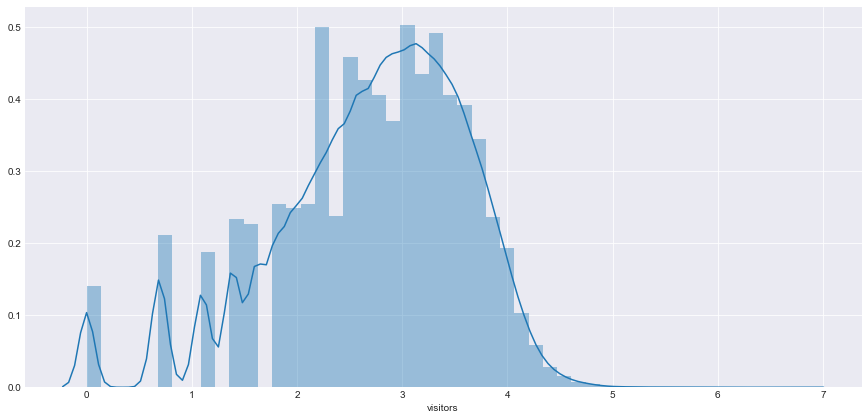

In [14]:
plt.figure(figsize=(15,7))
sns.distplot(np.log(AIR_VISIT_DATA['visitors']))
plt.legend()

Friday and the weekend appear to be the most popular days; which is to be expected. Monday and Tuesday have the lowest numbers of average visitors. 

Also during the year there is a certain amount of variation. Dec appears to be the most popular month for restaurant visits. The period of Mar - May is consistently busy.


<Figure size 864x288 with 0 Axes>

Text(0.5,0,'Date')

Text(0,0.5,'Visitors')

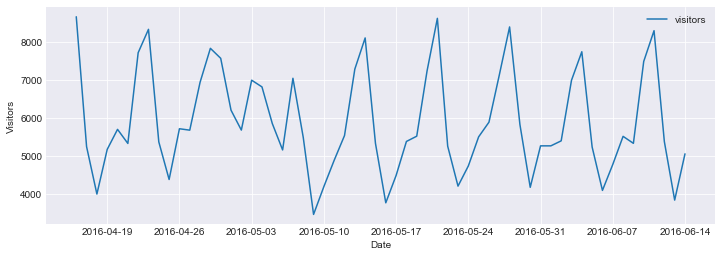

In [15]:
print("Friday and the weekend appear to be the most popular days; which is to be expected. Monday and Tuesday have the lowest numbers of average visitors. \n\n"
      "Also during the year there is a certain amount of variation. Dec appears to be the most popular month for restaurant visits. The period of Mar - May is consistently busy.")

df = AIR_VISIT_DATA[((AIR_VISIT_DATA['visit_date'] > '2016-04-15') & (AIR_VISIT_DATA['visit_date'] < '2016-06-15'))]
df1 = df.groupby(df['visit_date'])['visitors'].sum()
plt.figure(figsize=(12,4))
plt.plot(df1.index,df1)
plt.xlabel("Date")
plt.ylabel("Visitors")
plt.legend()

<Figure size 864x288 with 0 Axes>

Text(0.5,0,'Visit_Date')

Text(0,0.5,'Visitors')

<Figure size 864x288 with 0 Axes>

<BarContainer object of 24 artists>

Text(0.5,0,'Visit_hour')

Text(0,0.5,'Visitors')

We find: 
There were much fewer reservations made in 2016 through the air system; even none at all for a long stretch of time. The volume only increased during the end of that year. In 2017 the visitor numbers stayed strong. The artifical decline we see after the first quarter is most likely related to these reservations being at the end of the training time frame, which means that long-term reservations would not be part of this data set.Reservations are made typically for the dinner hours in the evening.


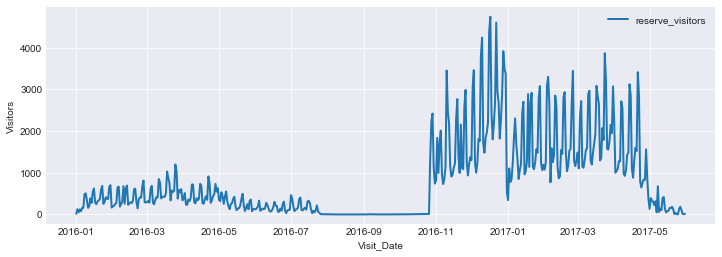

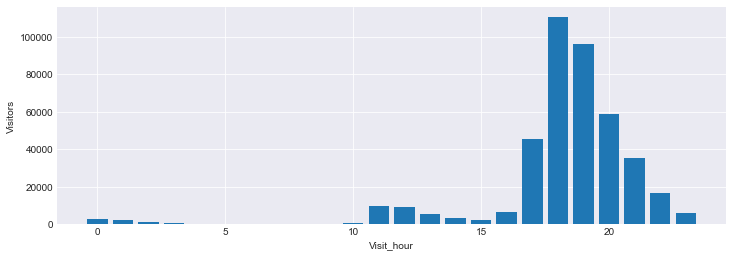

In [16]:
AIR_RESERVE['visit_datetime'] = pd.to_datetime(AIR_RESERVE['visit_datetime'])
AIR_RESERVE['reserve_datetime'] = pd.to_datetime(AIR_RESERVE['reserve_datetime'])
AIR_RESERVE['visit_hour'] = AIR_RESERVE['visit_datetime'].dt.hour
AIR_RESERVE['visit_date'] = AIR_RESERVE['visit_datetime'].dt.date

air_reserve_date = AIR_RESERVE.groupby(['visit_date'])['reserve_visitors'].sum()
plt.figure(figsize=(12,4))
plt.plot(air_reserve_date.index,air_reserve_date,lw = 2)
plt.xlabel("Visit_Date")
plt.ylabel("Visitors")
plt.legend()

air_reserve_hour = AIR_RESERVE.groupby(['visit_hour'])['reserve_visitors'].sum()
plt.figure(figsize=(12,4))
plt.bar(air_reserve_hour.index,air_reserve_hour)
plt.xlabel("Visit_hour")
plt.ylabel("Visitors")
plt.legend()

print("We find: \n"
      "There were much fewer reservations made in 2016 through the air system; even none at all for a long stretch of time. The volume only increased during the end of that year. In 2017 the visitor numbers stayed strong. The artifical decline we see after the first quarter is most likely related to these reservations being at the end of the training time frame, which means that long-term reservations would not be part of this data set."
      "Reservations are made typically for the dinner hours in the evening.")

<Figure size 576x576 with 0 Axes>

<BarContainer object of 92378 artists>

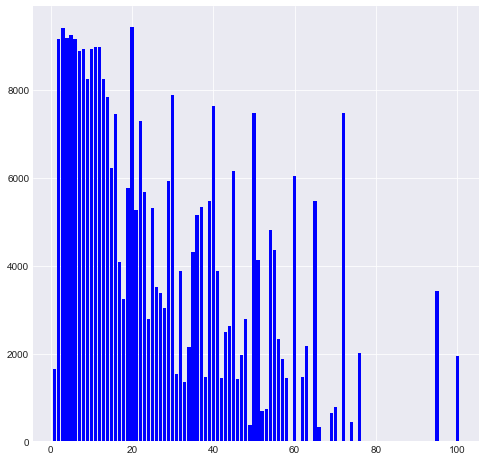

In [17]:
AIR_RESERVE['delta'] = AIR_RESERVE['visit_datetime']-AIR_RESERVE['reserve_datetime']
AIR_RESERVE['delta1'] = AIR_RESERVE['delta'].apply(lambda x: (x.total_seconds()/3600))
plt.figure(figsize=(8, 8))
plt.bar(AIR_RESERVE.reserve_visitors,AIR_RESERVE.delta1, color='blue')

<Figure size 864x288 with 0 Axes>

Text(0.5,0,'Visit_Date')

Text(0,0.5,'Visitors')

<Figure size 864x288 with 0 Axes>

<BarContainer object of 24 artists>

Text(0.5,0,'Visit_hour')

Text(0,0.5,'Visitors')

We find:
Here the visits after reservation follow a more orderly pattern, with a clear spike in Dec 2016. As above for the air data, we also see reservation visits dropping off as we get closer to the end of the time frame.Again, most reservations are for dinner, and we see another nice 24-hour pattern for making these reservations. It’s worth noting that here the last few hours before the visit don’t see more volume than the 24 or 48 hours before. This is in stark constrast to the air data.


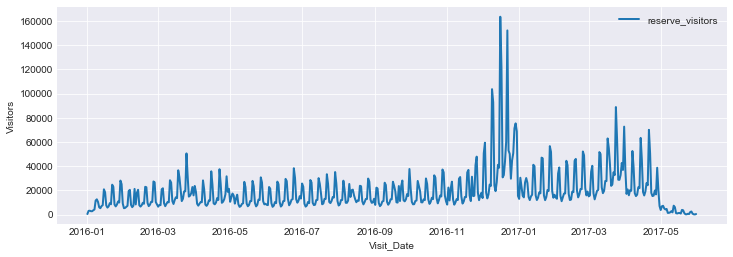

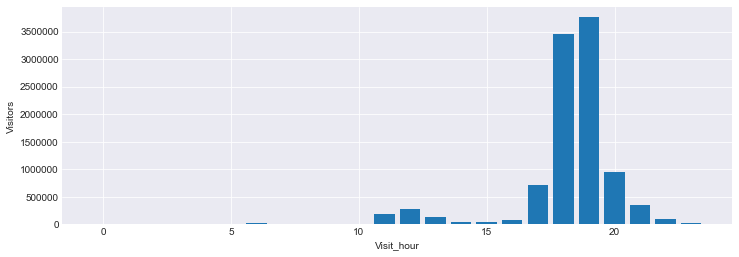

In [18]:
HPG_RESERVE['visit_datetime'] = pd.to_datetime(HPG_RESERVE['visit_datetime'])
HPG_RESERVE['reserve_datetime'] = pd.to_datetime(HPG_RESERVE['reserve_datetime'])
HPG_RESERVE['visit_hour'] = HPG_RESERVE['visit_datetime'].dt.hour
HPG_RESERVE['visit_date'] = HPG_RESERVE['visit_datetime'].dt.date

hpg_reserve_date = HPG_RESERVE.groupby(['visit_date'])['reserve_visitors'].sum()
plt.figure(figsize=(12,4))
plt.plot(hpg_reserve_date.index,hpg_reserve_date,lw = 2)
plt.xlabel("Visit_Date")
plt.ylabel("Visitors")
plt.legend()

hpg_reserve_hour = HPG_RESERVE.groupby(['visit_hour'])['reserve_visitors'].sum()
plt.figure(figsize=(12,4))
plt.bar(hpg_reserve_hour.index,hpg_reserve_hour)
plt.xlabel("Visit_hour")
plt.ylabel("Visitors")
plt.legend()

print("We find:\nHere the visits after reservation follow a more orderly pattern, with a clear spike in Dec 2016. As above for the air data, we also see reservation visits dropping off as we get closer to the end of the time frame."
      "Again, most reservations are for dinner, and we see another nice 24-hour pattern for making these reservations. It’s worth noting that here the last few hours before the visit don’t see more volume than the 24 or 48 hours before. This is in stark constrast to the air data.")

In [19]:
#HPG_RESERVE['delta'] = HPG_RESERVE['visit_datetime']-HPG_RESERVE['reserve_datetime']


In [20]:
import folium
from folium import plugins
print("After visualising the temporal aspects, let’s now look at the spatial information. Note, that according to the data description the “latitude and longitude are the latitude and longitude of the area to which the store belongs”. This is meant to discourage us from identifying specific restaurants. I would be surprised if nobody tried anyway, though.\n"
      "This is a fully interactive and zoomable map of all the air restaurants. Click on the clusters to break them up into smaller clusters and ultimately into the individual restaurants, which are labelled by their genre. The map nicely visualises the fact that many restaurants share common coordinates, since those coordinates refer to the area of the restaurant. Click on the single markers to see their air_store_id. The map is powered by the leaflet package, which includes a variety of cool tools for interactive maps. Have fun exploring!")

After visualising the temporal aspects, let’s now look at the spatial information. Note, that according to the data description the “latitude and longitude are the latitude and longitude of the area to which the store belongs”. This is meant to discourage us from identifying specific restaurants. I would be surprised if nobody tried anyway, though.
This is a fully interactive and zoomable map of all the air restaurants. Click on the clusters to break them up into smaller clusters and ultimately into the individual restaurants, which are labelled by their genre. The map nicely visualises the fact that many restaurants share common coordinates, since those coordinates refer to the area of the restaurant. Click on the single markers to see their air_store_id. The map is powered by the leaflet package, which includes a variety of cool tools for interactive maps. Have fun exploring!


In [21]:
m = folium.Map([AIR_STORE_INFO['latitude'].min(), AIR_STORE_INFO['longitude'].max()], zoom_start=4)

In [22]:
for index, row in AIR_STORE_INFO.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                  icon=folium.Icon(icon='circle')
                 ).add_to(m)
m

In [23]:
m2 = folium.Map([HPG_STORE_INFO['latitude'].min(), AIR_STORE_INFO['longitude'].max()], zoom_start=4)
print("In the same way as for the air stores above, we also create an interactive map for the different hpg restaurants:")

In the same way as for the air stores above, we also create an interactive map for the different hpg restaurants:


In [24]:
for index, row in AIR_STORE_INFO.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                  icon=folium.Icon(icon='circle')
                 ).add_to(m2)
m2

We find:
 There are lots of Izakaya gastropubs in our data, followed by Cafe’s. We don’t have many Karaoke places in the air data set and also only a few that describe themselves as generically “International” or “Asian”.I have to admit, I’m kind of intrigued by “creative cuisine”.Fukuoka has the largest number of air restaurants per area, followed by many Tokyo areas.


Text(0.5,0,'Number of Restaurants')

Text(0,0.5,'Type of Cuisine')

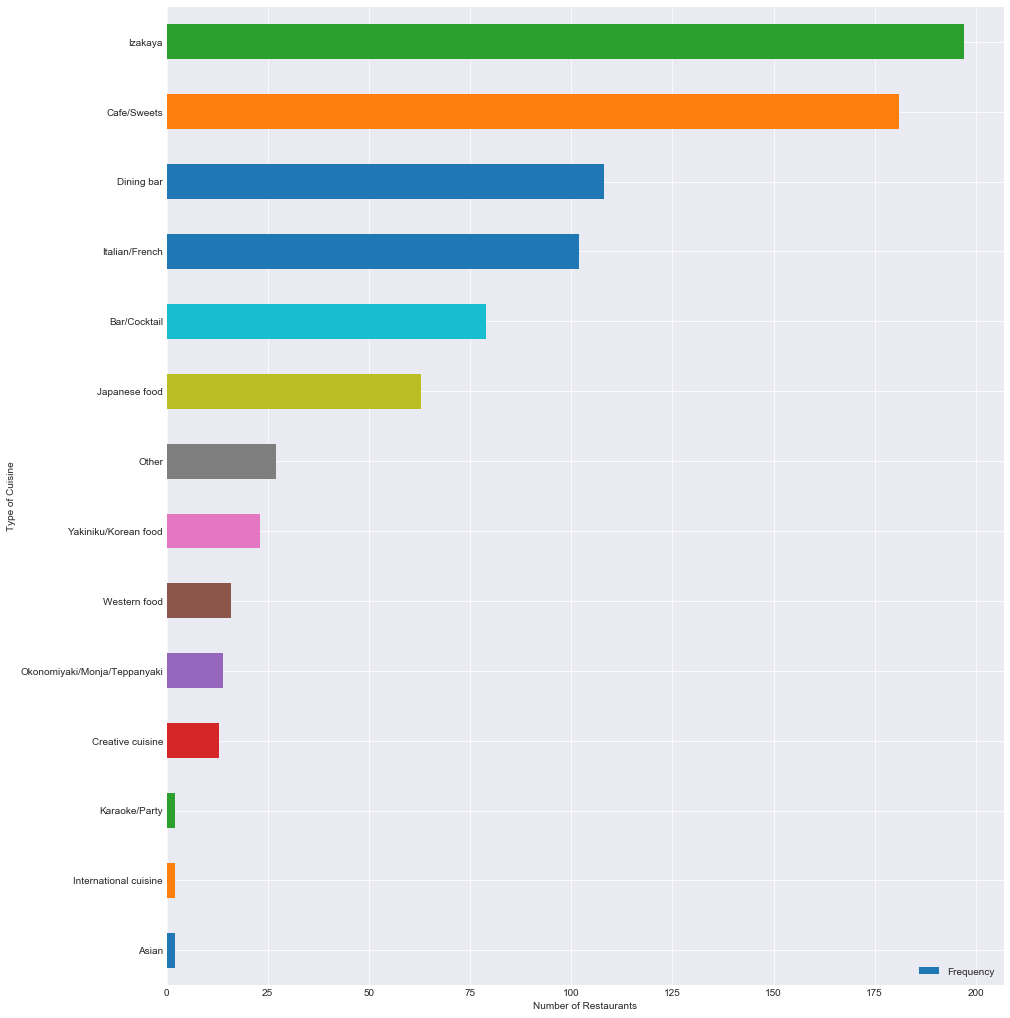

In [25]:
print("We find:\n There are lots of Izakaya gastropubs in our data, followed by Cafe’s. We don’t have many Karaoke places in the air data set and also only a few that describe themselves as generically “International” or “Asian”."
      "I have to admit, I’m kind of intrigued by “creative cuisine”.Fukuoka has the largest number of air restaurants per area, followed by many Tokyo areas.")

air_store= AIR_STORE_INFO.groupby(['air_genre_name']).size().reset_index(name = 'Frequency')
air_store.sort_values(by='Frequency', inplace=True)
air_store.plot(x='air_genre_name',y='Frequency', kind='barh', sort_columns='air_genre_name', figsize=(15,18))
plt.xlabel("Number of Restaurants")
plt.ylabel("Type of Cuisine")
plt.legend()

Text(0.5,0,'Number of HPG Resturants')

Text(0,0.5,'Top 15 areas HPG(hpg_area_genre)')

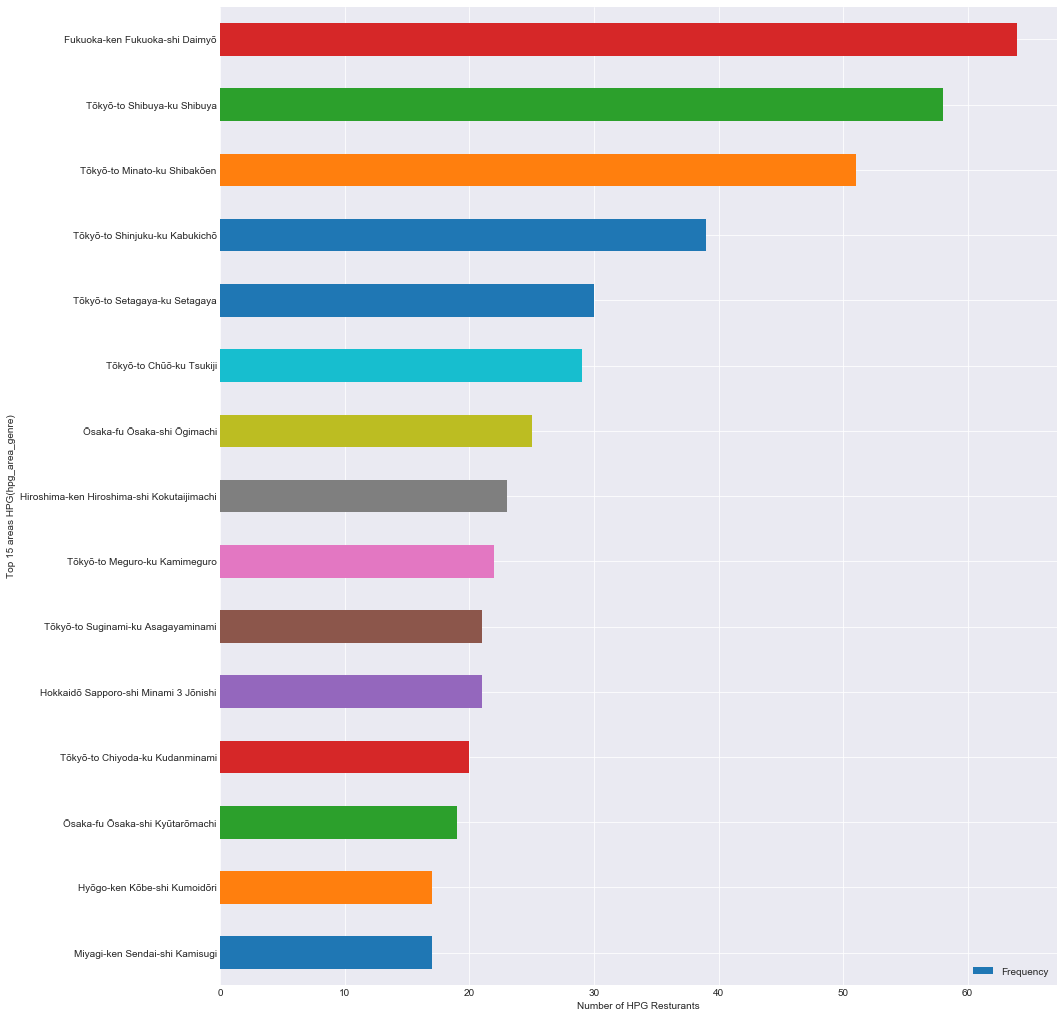

In [26]:
air_area = AIR_STORE_INFO.groupby(AIR_STORE_INFO['air_area_name']).size().reset_index(name="Frequency")
air_area.sort_values(by='Frequency',inplace=True)
air_area2 = air_area.tail(15)
air_area2.plot(x='air_area_name', y='Frequency', kind='barh', figsize=(15,18))
plt.xlabel('Number of HPG Resturants')
plt.ylabel('Top 15 areas HPG(hpg_area_genre)')

In [27]:
HPG_STORE_INFO.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


[Text(0,0.5,'HPG Genre Name'), Text(0.5,0,'Number of HPG Restaurants')]

[Text(0,0.5,'Area Name'), Text(0.5,0,'Number of HPG Restaurants')]

We find:
 The hpg description contains a larger variety of genres than in the air data. Here, “Japanese style” appears to contain many more places that are categorised more specifically in the air data.The same applies to “International cuisine”.In the top 15 area we find again Tokyo and Osaka to be prominently present.


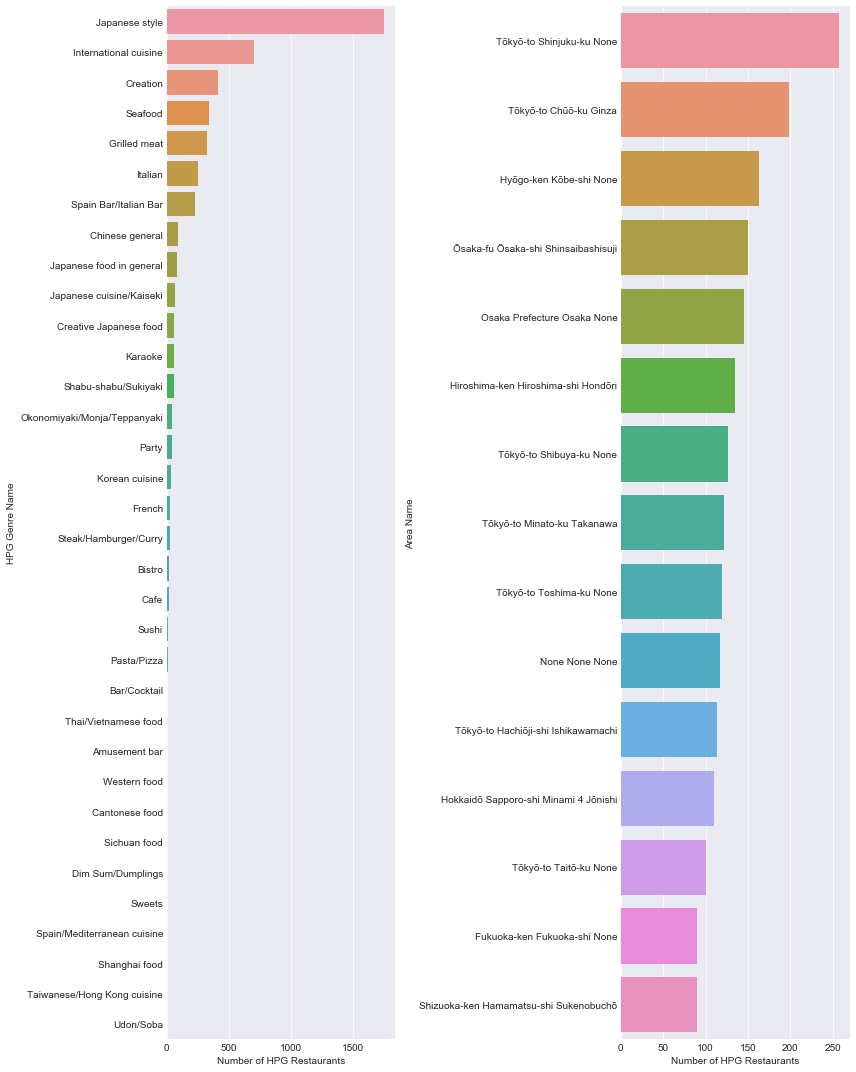

In [28]:
hpg_store_genre = HPG_STORE_INFO.groupby(HPG_STORE_INFO['hpg_genre_name'])['hpg_store_id'].count().reset_index()
hpg_store_genre = hpg_store_genre.sort_values(['hpg_store_id'],ascending=False)

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,15))
plt1 = sns.barplot(x= 'hpg_store_id', y='hpg_genre_name',data = hpg_store_genre,ax = ax1)
plt1.set(xlabel="Number of HPG Restaurants",ylabel='HPG Genre Name')

hpg_store_area = HPG_STORE_INFO.groupby(HPG_STORE_INFO['hpg_area_name'])['hpg_store_id'].count().reset_index()
hpg_store_area = hpg_store_area.sort_values(['hpg_store_id'],ascending=False)
hpg_store_area1 = hpg_store_area.head(15)

plt2=sns.barplot(x= "hpg_store_id", y="hpg_area_name",data = hpg_store_area1,ax=ax2)
plt2.set(xlabel="Number of HPG Restaurants",ylabel="Area Name")
plt.tight_layout()

print("We find:\n The hpg description contains a larger variety of genres than in the air data. Here, “Japanese style” appears to contain many more places that are categorised more specifically in the air data."
      "The same applies to “International cuisine”.In the top 15 area we find again Tokyo and Osaka to be prominently present.")


In [29]:
DATE_INFO['visit_date'] = pd.to_datetime(DATE_INFO['visit_date'])
holidays16 = DATE_INFO[((DATE_INFO['visit_date'] >'2016-04-15') & (DATE_INFO['visit_date'] < '2016-06-01'))]
holidays17 = DATE_INFO[((DATE_INFO['visit_date'] >'2017-04-15') & (DATE_INFO['visit_date'] < '2017-06-01'))]

Let’s have a quick look at the holidays. We’ll plot how many there are in total and also how they are distributed during our prediction time range in 2017 and the corresponding time in 2016:


[]

[[]]

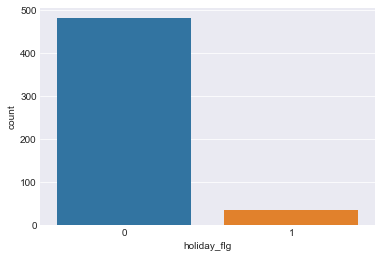

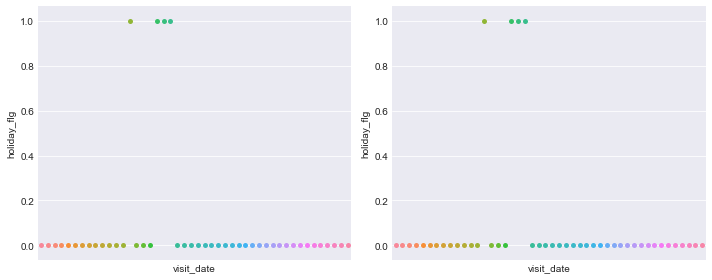

In [30]:
sns.countplot(x="holiday_flg",data = DATE_INFO)
print("Let’s have a quick look at the holidays. We’ll plot how many there are in total and also how they are distributed during our prediction time range in 2017 and the corresponding time in 2016:")
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(10,4))
plt2 = sns.stripplot(x='visit_date',y='holiday_flg',data=holidays16, ax=ax1)
plt2.set_xticks([])

plt3 = sns.stripplot(x='visit_date',y='holiday_flg',data=holidays17, ax=ax2)
plt3.set(xticks=[])

plt.tight_layout()

In [31]:
air_visit = AIR_VISIT_DATA.groupby(AIR_VISIT_DATA['visit_date'])['visitors'].sum().reset_index()
air_visit['visit_date'] = pd.to_datetime(air_visit['visit_date'])
air_visit['year'] = air_visit['visit_date'].dt.year
air_visit['month'] = air_visit['visit_date'].dt.month
air_visit['day'] = air_visit['visit_date'].dt.day

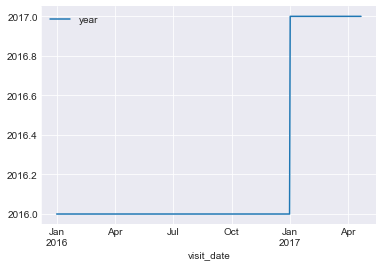

In [32]:
air_visit[['visit_date','year']].set_index('visit_date').plot()

In [33]:
SAMPLE_SUBMISSION['date'] = SAMPLE_SUBMISSION['id'][0].split('_')[2]
SAMPLE_SUBMISSION['date'] = pd.to_datetime(SAMPLE_SUBMISSION['date'])
SAMPLE_SUBMISSION['year'] = SAMPLE_SUBMISSION['date'].dt.year

In [34]:
test = SAMPLE_SUBMISSION.iloc[:, :72]

In [35]:
print("After looking at every data set individually, let’s get to the real fun and start combining them. This will tell us something about the relations between the various features and how these relationsy might"
      "affect the visitor numbers. Any signal we find will need to be interpreted in the context of the individual feature distributions; which is why it was one of our first steps to study those.\n "
      "Our first plot of the multi-feature space deals with the average number of air restaurant visitors broken down by type of cuisine; i.e. the air_genre_name. We use a facet plot to distinguish the time series for the 14 categories. Note the logarithmic y-axis:")

After looking at every data set individually, let’s get to the real fun and start combining them. This will tell us something about the relations between the various features and how these relationsy mightaffect the visitor numbers. Any signal we find will need to be interpreted in the context of the individual feature distributions; which is why it was one of our first steps to study those.
 Our first plot of the multi-feature space deals with the average number of air restaurant visitors broken down by type of cuisine; i.e. the air_genre_name. We use a facet plot to distinguish the time series for the 14 categories. Note the logarithmic y-axis:


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000068261DD8>,
      dtype=object)

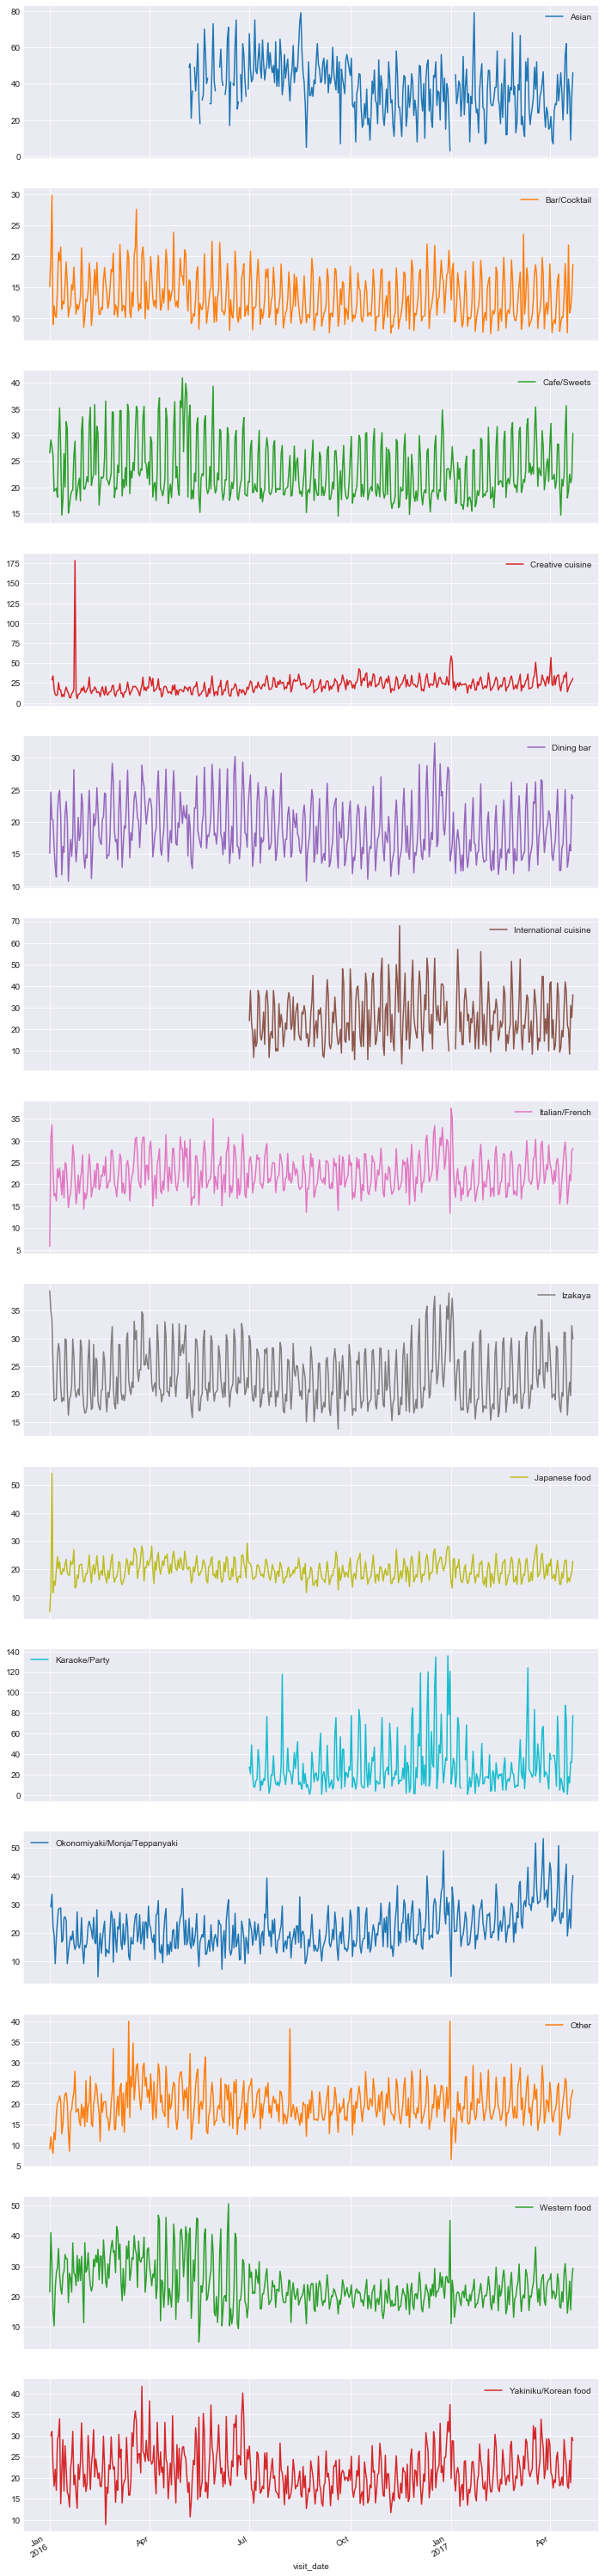

In [36]:
ab = pd.merge(AIR_VISIT_DATA,AIR_STORE_INFO,on='air_store_id')
ab1 = ab.groupby(['visit_date','air_genre_name'])['visitors'].mean().reset_index()
ab13 = ab1.pivot_table(values='visitors',index='visit_date',columns='air_genre_name')
ab13.plot(subplots=True,figsize=(12,60))

Text(0.5,0,'Wdays')

Text(0,0.5,'Average number of visitors')

Here each colour corresponds to a day of the week. Red-ish coulours are the weekend, while the cooler colours are the middle of the week. Monday is dark orange.
 We find:
The biggest difference between weekend and weekdays exists for the “Karaoke” bars, which rule the weekend. A similar trend, although with a considerably smaller gap, can be seen for the “International” cuisine.No genre really goes against the trend of busier weekends. The smallest variations are in the generic “Other” category, the “Japanese” food, and also the “Korean” cuisine which is the only category where Fridays are the busiest days. General “Bars/Cocktail” are notably unpopular overall.


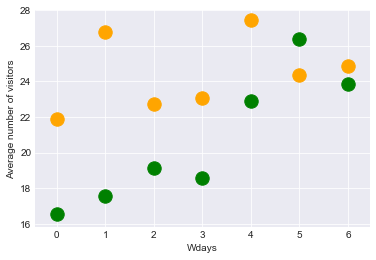

In [37]:
hol = pd.merge(AIR_VISIT_DATA, DATE_INFO, on='visit_date')
pos= hol[(hol['holiday_flg'] == 1)]
neg= hol[(hol['holiday_flg'] == 0)]
pos1 = pos.groupby(['day_of_week_x'])['visitors'].mean().reset_index()
neg1 = neg.groupby(['day_of_week_x'])['visitors'].mean().reset_index()

plt.scatter(pos1.day_of_week_x, pos1.visitors, label= "Holiday Flag = 1", color= "orange",  
            marker= "o", s=180) 
plt.scatter(neg1.day_of_week_x, neg1.visitors, label= "Holiday Flag = 2", color= "green",  
            marker= "o", s=180) 
plt.xlabel('Wdays')
plt.ylabel('Average number of visitors')

print("Here each colour corresponds to a day of the week. Red-ish coulours are the weekend, while the cooler colours are the middle of the week. Monday is dark orange.\n We find:\n"
      "The biggest difference between weekend and weekdays exists for the “Karaoke” bars, which rule the weekend. A similar trend, although with a considerably smaller gap, can be seen for the “International” cuisine."
      "No genre really goes against the trend of busier weekends. The smallest variations are in the generic “Other” category, the “Japanese” food, and also the “Korean” cuisine which is the only category where Fridays are the busiest days. General “Bars/Cocktail” are notably unpopular overall.")

<Figure size 1800x1080 with 0 Axes>

Text(0.5,1,'air_genre_name')

Text(0.5,0,'Mean of visitors')

Text(0,0.5,'Air genre name')

<Figure size 1800x1080 with 0 Axes>

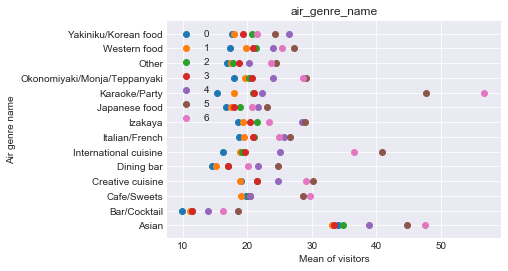

In [38]:
plt.figure(figsize=(25,15))
hip = pd.merge(AIR_STORE_INFO, hol, on='air_store_id')
hip1 = hip.groupby(['air_genre_name','day_of_week_x'])['visitors'].mean().reset_index()

fig, ax = plt.subplots()

for c, df in hip1.groupby('day_of_week_x'):
    ax.scatter(df['visitors'], df['air_genre_name'], label=c)
ax.legend()
ax.set_title('air_genre_name')
ax.set_xlabel('Mean of visitors')
ax.set_ylabel('Air genre name')

Overall, holidays don’t have any impact on the average visitor numbers (left panel). As so often, more information is hidden in the details.While a weekend holiday has little impact on the visitor numbers, and even decreases them slightly, there is a much more pronounced effect for the weekdays; especially Monday and Tuesday (right panel).


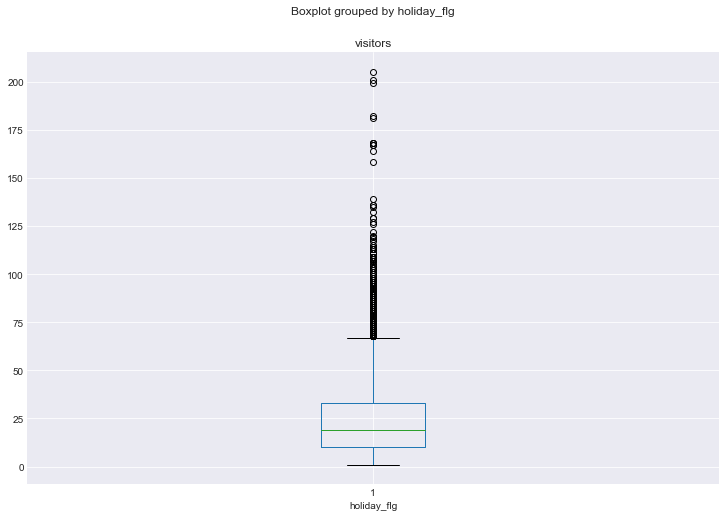

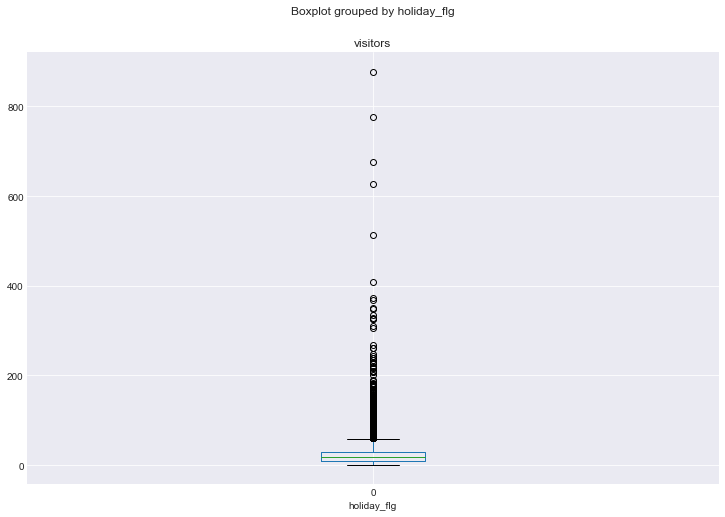

In [39]:
pos.boxplot(column='visitors', by='holiday_flg', figsize=(12,8))
neg.boxplot(column='visitors', by='holiday_flg', figsize=(12,8))
print("Overall, holidays don’t have any impact on the average visitor numbers (left panel). As so often, more information is hidden in the details."
      "While a weekend holiday has little impact on the visitor numbers, and even decreases them slightly, there is a much more pronounced effect for the weekdays; especially Monday and Tuesday (right panel).")

In [40]:
print("Our next exploration follows from a simple thought: if gastropubs are popular and we own the only gastropub in the area then we can expect lots of customers. If there are twelve other gastropubs in our street then, try as we might, some of those customers will venture into other establishments. Economists tell us that we can ultimately expect a convergence towards an equilibrium between supply and demand. But for snapshots like our data set, and for relatively localised areas, there might still be merit in investigating restaurant clustering. Therefore, let’s study the number of restaurants of a certain genre per area and their impact on visitor numbers.\n"
      "We begin with an overview plot of the frequency of certain genres per area for the two data sets of air and hpg stores. This could have well been a part of the previous chapter, but I only just thought about it ;-) . The following count plots show which genres exist in which areas (names truncated). The size of the dots is proportional to the number of cases:")

Our next exploration follows from a simple thought: if gastropubs are popular and we own the only gastropub in the area then we can expect lots of customers. If there are twelve other gastropubs in our street then, try as we might, some of those customers will venture into other establishments. Economists tell us that we can ultimately expect a convergence towards an equilibrium between supply and demand. But for snapshots like our data set, and for relatively localised areas, there might still be merit in investigating restaurant clustering. Therefore, let’s study the number of restaurants of a certain genre per area and their impact on visitor numbers.
We begin with an overview plot of the frequency of certain genres per area for the two data sets of air and hpg stores. This could have well been a part of the previous chapter, but I only just thought about it ;-) . The following count plots show which genres exist in which areas (names truncated). The size of the dots is proportional

<Figure size 1800x1080 with 0 Axes>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102],
 <a list of 103 Text xticklabel objects>)

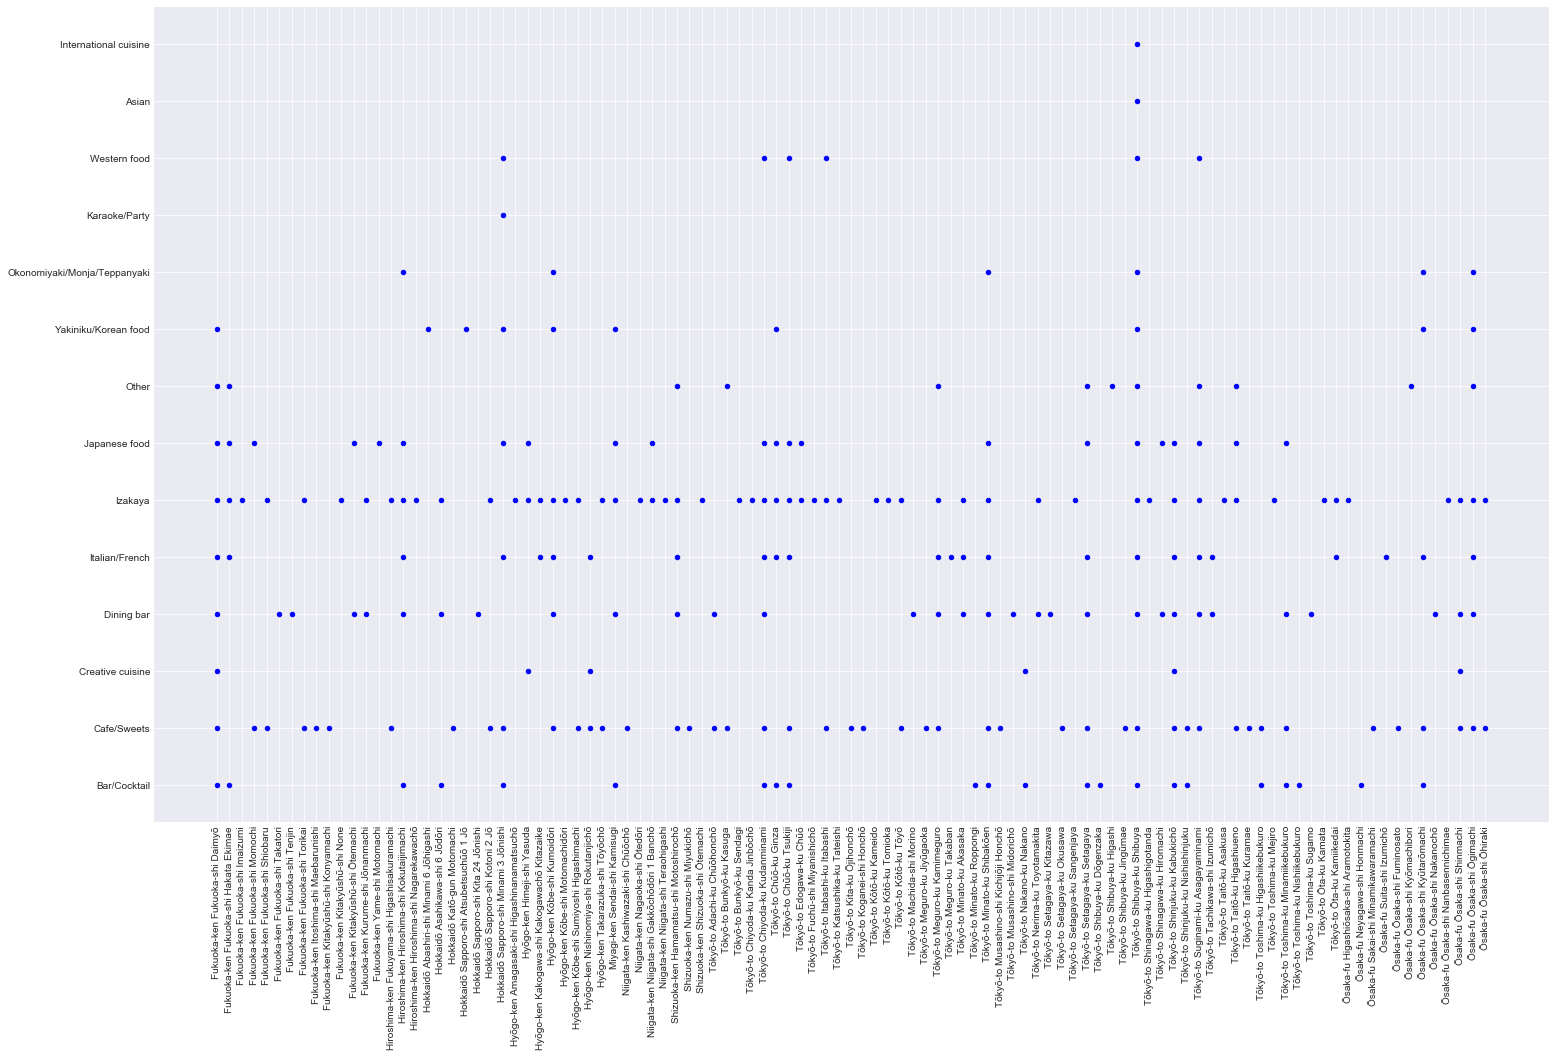

In [41]:
plt.figure(figsize=(25,15))
air_area_per_store = AIR_STORE_INFO.groupby(['air_area_name','air_genre_name'])['air_store_id'].count().reset_index(name="frequency")
#air_area_per_store
plt.scatter(air_area_per_store.air_area_name,air_area_per_store.air_genre_name, label='stars', color='blue' ,marker='o', s=20)
plt.xticks(rotation=90)

<Figure size 1800x1080 with 0 Axes>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118],
 <a list of 119 Text xticklabel objects>)

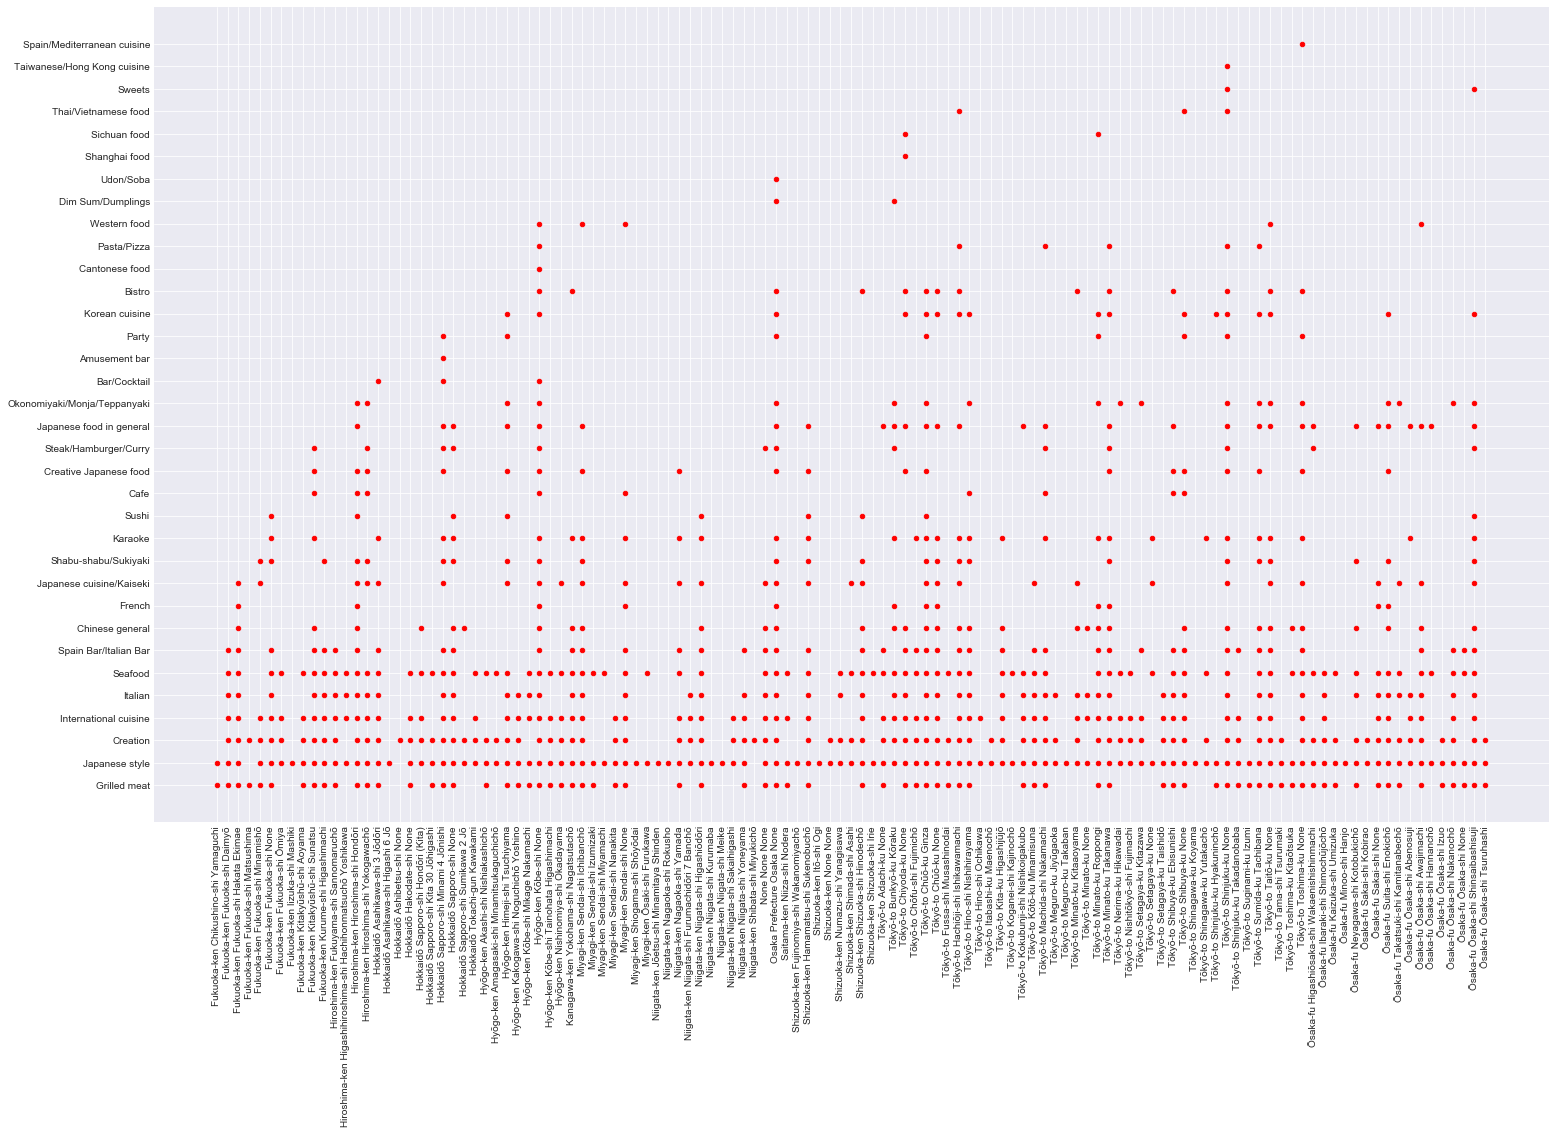

In [42]:
plt.figure(figsize=(25,15))
hpg_area_per_store = HPG_STORE_INFO.groupby(['hpg_area_name','hpg_genre_name'])['hpg_store_id'].count().reset_index(name="frequency")
#air_area_per_store
plt.scatter(hpg_area_per_store.hpg_area_name,hpg_area_per_store.hpg_genre_name, label='stars', color='red' ,marker='o', s=20)
plt.xticks(rotation=90)

In [43]:
print("The count plots tell us that there is a distribution of how many restaurants of a certain genre can be found per area. Here we look at these distributions in detail via boxplots with overlayed jitter plots. The genres are ordered by decreasing mean cases per area, i.e. the mean of a horizontal sequence of dots in a count plot. The we overlay the indvidual data point and assign each dot a random jitter to visually separate otherwise overlapping data. Here, the y axis (i.e. “Occurences per area”) correspond to the size of the dots in the count plots above. We’re using single plots here, instead of panels, because these plots are quite detailed. Note the logarithmic y-axes.\n"
      "We start with the air data:")

The count plots tell us that there is a distribution of how many restaurants of a certain genre can be found per area. Here we look at these distributions in detail via boxplots with overlayed jitter plots. The genres are ordered by decreasing mean cases per area, i.e. the mean of a horizontal sequence of dots in a count plot. The we overlay the indvidual data point and assign each dot a random jitter to visually separate otherwise overlapping data. Here, the y axis (i.e. “Occurences per area”) correspond to the size of the dots in the count plots above. We’re using single plots here, instead of panels, because these plots are quite detailed. Note the logarithmic y-axes.
We start with the air data:


<Figure size 432x432 with 0 Axes>

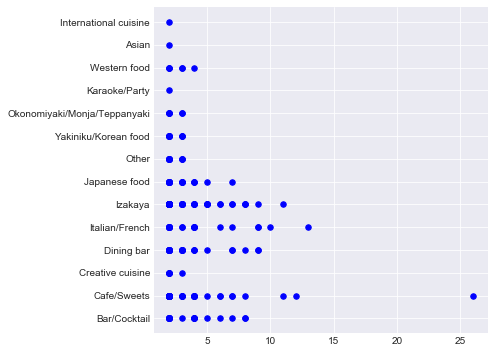

In [44]:
plt.figure(figsize=(6,6))
air_freq= AIR_STORE_INFO.groupby(['air_area_name','air_genre_name'])['air_genre_name'].count().reset_index(name='frequency')
plt.scatter(air_freq.frequency,air_freq.air_genre_name, label='stars', color='blue', marker='o', s=30)


<Figure size 432x432 with 0 Axes>

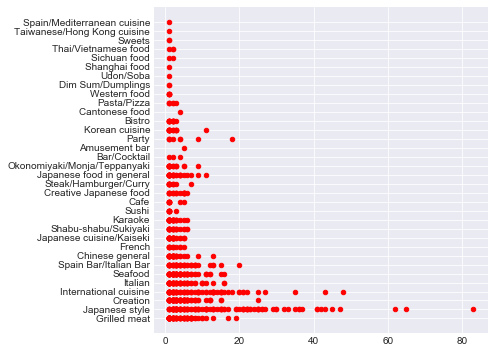

In [45]:
plt.figure(figsize=(6,6))
hpg= HPG_STORE_INFO.groupby(['hpg_area_name','hpg_genre_name'])['hpg_genre_name'].count().reset_index(name='frequency')
plt.scatter(hpg.frequency,hpg.hpg_genre_name, label='stars', color='red', marker='o', s=20) 

In [46]:
print("Using the information on the number of genres in each area we can now proceed to quantify the clustering, or “crowdedness”, of our data set and relate it to the visitor numbers." 
      "The next plot first shows the overall distribution of the air and hpg data points from the last two plots (i.e. cases of the same genre per area).")

Using the information on the number of genres in each area we can now proceed to quantify the clustering, or “crowdedness”, of our data set and relate it to the visitor numbers.The next plot first shows the overall distribution of the air and hpg data points from the last two plots (i.e. cases of the same genre per area).


<Figure size 576x576 with 0 Axes>

<BarContainer object of 103 artists>

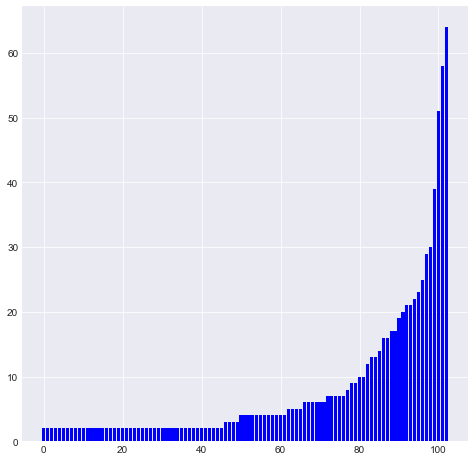

In [47]:
air_genre_per = AIR_STORE_INFO.groupby(AIR_STORE_INFO['air_area_name'])['air_genre_name'].count().reset_index()
air_genre_per= air_genre_per.sort_values('air_genre_name').reset_index()
plt.figure(figsize=(8, 8))
plt.bar(air_genre_per.index,air_genre_per.air_genre_name, color='blue')

<Figure size 576x576 with 0 Axes>

<BarContainer object of 119 artists>

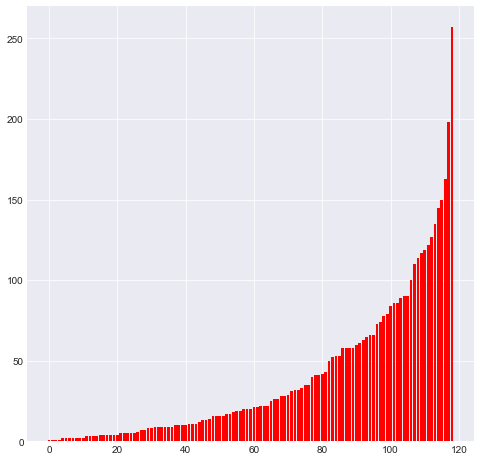

In [48]:
hpg_genre_per = HPG_STORE_INFO.groupby(HPG_STORE_INFO['hpg_area_name'])['hpg_genre_name'].count().reset_index()
hpg_genre_per= hpg_genre_per.sort_values('hpg_genre_name').reset_index()
plt.figure(figsize=(8, 8))
plt.bar(hpg_genre_per.index,hpg_genre_per.hpg_genre_name, color='red')

In [ ]:
HPG_RESERVE['delta'] = HPG_RESERVE['visit_datetime']-HPG_RESERVE['reserve_datetime']
HPG_RESERVE['delta1'] = HPG_RESERVE['delta'].apply(lambda x: (x.total_seconds()/3600))
plt.figure(figsize=(8, 8))
plt.bar(HPG_RESERVE.reserve_visitors,HPG_RESERVE.delta1, color='blue')